# Data analysis and plotting code


see the `REQUIREMENTS.txt` file for packages needed to run this.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as pl
import statsmodels.api as sm

## Set plot styles

There's no clear guidance about figure sizes for the journal. Reverse engineering suggests two-column figure is about 15.1 cm

In [2]:
pl.rcParams['figure.figsize'] = (15.1/2.54, 12/2.54)
pl.rcParams['font.size'] = 8
pl.rcParams['font.family'] = 'Arial'
pl.rcParams['xtick.direction'] = 'out'
pl.rcParams['xtick.minor.visible'] = True
pl.rcParams['ytick.minor.visible'] = True
pl.rcParams['ytick.right'] = True
pl.rcParams['xtick.top'] = True
pl.rcParams['figure.dpi'] = 96   # 300 for production

In [3]:
temp_df = pd.read_csv('../data/SR15_MAGICC6_median.csv', skipfooter=1, engine='python')
beccs_df = pd.read_csv('../data/SR15_BECCS.csv', skipfooter=1, engine='python')
fed_df = pd.read_csv('../data/SR15_Final_Energy.csv', skipfooter=1, engine='python')
cat_df = pd.read_csv('../data/SR15_scenario_categories.csv')
beccs_extra_df = pd.read_csv('../data/Liu_et_al_2018_scenarios.csv')

In [4]:
cat_df.set_index(['Model','Scenario'], inplace=True)

In [5]:
fed_df = fed_df.set_index(['Model','Scenario'])

In [6]:
temp_df = temp_df.set_index(['Model','Scenario'])

In [7]:
temp_peak = temp_df.max(axis=1)
temp_peak.name = 'peak_temp'

## Data organisation and cleaning

### For BECCS, we want to interpolate missing years linearly as scenarios only give BECCS every 5 or 10 years

In [8]:
beccs_df = pd.concat([beccs_df, beccs_extra_df])

In [9]:
beccs_df = beccs_df.set_index(['Model','Scenario'])
for year in range(2001,2100):
    if year%5==0:
        continue
    beccs_df.insert(4+(year-2001),str(year),np.nan)
beccs_df = beccs_df.loc[:,'2000':'2100'].interpolate(axis=1)

### Insert BECCS assumptions from the missing pathways

In [10]:
beccs_df.loc[('AIM/CGE 2.0', 'ADVANCE_NoPolicy'),:] = np.zeros(101)
beccs_df.loc[('AIM/CGE 2.0', 'SFCM_SSP2_Bio_Baseline'),:] = np.zeros(101)
beccs_df.loc[('AIM/CGE 2.0', 'SFCM_SSP2_EEEI_Baseline'),:] = np.zeros(101)
beccs_df.loc[('AIM/CGE 2.0', 'SFCM_SSP2_LifeStyle_Baseline'),:] = np.zeros(101)
beccs_df.loc[('AIM/CGE 2.0', 'SFCM_SSP2_Ref_Baseline'),:] = np.zeros(101)
beccs_df.loc[('AIM/CGE 2.0', 'SFCM_SSP2_ST_CCS_Baseline'),:] = np.zeros(101)
beccs_df.loc[('AIM/CGE 2.0', 'SFCM_SSP2_ST_bio_Baseline'),:] = np.zeros(101)
beccs_df.loc[('AIM/CGE 2.0', 'SFCM_SSP2_ST_nuclear_Baseline'),:] = np.zeros(101)
beccs_df.loc[('AIM/CGE 2.0', 'SFCM_SSP2_ST_solar_Baseline'),:] = np.zeros(101)
beccs_df.loc[('AIM/CGE 2.0', 'SFCM_SSP2_ST_wind_Baseline'),:] = np.zeros(101)
beccs_df.loc[('AIM/CGE 2.0', 'SFCM_SSP2_SupTech_Baseline'),:] = np.zeros(101)
beccs_df.loc[('AIM/CGE 2.0', 'SFCM_SSP2_combined_Baseline'),:] = np.zeros(101)
beccs_df.loc[('AIM/CGE 2.0', 'SSP1-45'),:] = np.zeros(101)
beccs_df.loc[('AIM/CGE 2.0', 'SSP1-Baseline'),:] = np.zeros(101)
beccs_df.loc[('AIM/CGE 2.0', 'SSP2-60'),:] = np.zeros(101)
beccs_df.loc[('AIM/CGE 2.0', 'SSP2-Baseline'),:] = np.zeros(101)
beccs_df.loc[('AIM/CGE 2.0', 'SSP3-Baseline'),:] = np.zeros(101)
beccs_df.loc[('AIM/CGE 2.0', 'SSP4-Baseline'),:] = np.zeros(101)
beccs_df.loc[('AIM/CGE 2.0', 'SSP5-Baseline'),:] = np.zeros(101)

beccs_df.loc[('AIM/CGE 2.1', 'CD-LINKS_NoPolicy'),:] = np.zeros(101)  # should check out the CD-Links project
beccs_df.loc[('AIM/CGE 2.1', 'EMF33_Baseline'),:] = np.zeros(101)
beccs_df.loc[('AIM/CGE 2.1', 'EMF33_Med2C_nobeccs'),:] = np.zeros(101)
beccs_df.loc[('AIM/CGE 2.1', 'EMF33_Med2C_none'),:] = np.zeros(101)
beccs_df.loc[('AIM/CGE 2.1', 'EMF33_tax_hi_none'),:] = np.zeros(101)
beccs_df.loc[('AIM/CGE 2.1', 'EMF33_tax_lo_none'),:] = np.zeros(101)
beccs_df.loc[('AIM/CGE 2.1', 'TERL_Baseline_LowCarbonTransportPolicy'),:] = np.zeros(101)
beccs_df.loc[('AIM/CGE 2.1', 'TERL_Baseline_NoTransportPolicy'),:] = np.zeros(101)

beccs_df.loc[('MESSAGEix-GLOBIOM 1.0', 'LowEnergyDemand'),:] = np.zeros(101)

# Drop IEA World Energy Model as this has a 2050 horizon
beccs_df.drop(labels=("IEA World Energy Model 2017", "Faster Transition Scenario"), inplace=True)

with pd.option_context('display.max_rows', 1000, 'display.max_columns', 1000):    
    display(beccs_df)

2000  \
Model                 Scenario                                           
AIM/CGE 2.0           ADVANCE_2020_1.5C-2100                       NaN   
                      ADVANCE_2020_Med2C                           NaN   
                      ADVANCE_2020_WB2C                            NaN   
                      ADVANCE_2030_Med2C                           NaN   
                      ADVANCE_2030_Price1.5C                       NaN   
                      ADVANCE_2030_WB2C                            NaN   
                      ADVANCE_INDC                                 NaN   
                      SSP1-19                                      NaN   
                      SSP1-26                                      NaN   
                      SSP1-34                                      NaN   
                      SSP2-19                                      NaN   
                      SSP2-26                                      NaN   
                      SSP2-34                                      NaN   
                      SSP2-45                                      NaN   
                      SSP3-34                                      NaN   
                      SSP3-45                                      NaN   
                      SSP3-60                                      NaN   
                      SSP4-26                                      NaN   
                      SSP4-34                                      NaN   
                      SSP4-45                                      NaN   
                      SSP5-26                                      NaN   
                      SSP5-34                                      NaN   
                      SSP5-45                                      NaN   
                      SSP5-60                                      NaN   
AIM/CGE 2.1           CD-LINKS_INDCi                               NaN   
                      CD-LINKS_NPi2020_1000                        NaN   
                      CD-LINKS_NPi2020_1600                        NaN   
                      CD-LINKS_NPi2020_400                         NaN   
                      EMF33_Med2C_cost100                          NaN   
                      EMF33_Med2C_full                             NaN   
                      EMF33_WB2C_cost100                           NaN   
                      EMF33_WB2C_full                              NaN   
                      EMF33_tax_hi_full                            NaN   
                      EMF33_tax_lo_full                            NaN   
                      TERL_15D_LowCarbonTransportPolicy            NaN   
                      TERL_15D_NoTransportPolicy                   NaN   
                      TERL_2D_LowCarbonTransportPolicy             NaN   
                      TERL_2D_NoTransportPolicy                    NaN   
C-ROADS-5.005         Ratchet-1.5-allCDR                           NaN   
                      Ratchet-1.5-limCDR                           NaN   
                      Ratchet-1.5-limCDR-noOS                      NaN   
                      Ratchet-1.5-noCDR                            NaN   
                      Ratchet-1.5-noCDR-noOS                       NaN   
                      Reference                                    NaN   
GCAM 4.2              SSP1-19                                      NaN   
                      SSP1-26                                      NaN   
                      SSP1-34                                      NaN   
                      SSP1-45                                      NaN   
                      SSP1-Baseline                                NaN   
                      SSP2-19                                      NaN   
                      SSP2-26                                      NaN   
                      SSP2-34                                      NaN   
                      SSP2-45                                      NaN

In [11]:
beccs_df.shape

(397, 101)

In [12]:
beccs_cumulative_df = beccs_df.loc[:,'2000':'2100'].cumsum(axis=1)
#beccs_cumulative.name = 'cumulative_beccs'
beccs_cumulative_df

2000  2001  \
Model                 Scenario                                             
AIM/CGE 2.0           ADVANCE_2020_1.5C-2100                   NaN   NaN   
                      ADVANCE_2020_Med2C                       NaN   NaN   
                      ADVANCE_2020_WB2C                        NaN   NaN   
                      ADVANCE_2030_Med2C                       NaN   NaN   
                      ADVANCE_2030_Price1.5C                   NaN   NaN   
...                                                            ...   ...   
AIM/CGE 2.1           EMF33_tax_hi_none                        0.0   0.0   
                      EMF33_tax_lo_none                        0.0   0.0   
                      TERL_Baseline_LowCarbonTransportPolicy   0.0   0.0   
                      TERL_Baseline_NoTransportPolicy          0.0   0.0   
MESSAGEix-GLOBIOM 1.0 LowEnergyDemand                          0.0   0.0   

                                                              2002  2003  \
Model                 Scenario                                             
AIM/CGE 2.0           ADVANCE_2020_1.5C-2100                   NaN   NaN   
                      ADVANCE_2020_Med2C                       NaN   NaN   
                      ADVANCE_2020_WB2C                        NaN   NaN   
                      ADVANCE_2030_Med2C                       NaN   NaN   
                      ADVANCE_2030_Price1.5C                   NaN   NaN   
...                                                            ...   ...   
AIM/CGE 2.1           EMF33_tax_hi_none                        0.0   0.0   
                      EMF33_tax_lo_none                        0.0   0.0   
                      TERL_Baseline_LowCarbonTransportPolicy   0.0   0.0   
                      TERL_Baseline_NoTransportPolicy          0.0   0.0   
MESSAGEix-GLOBIOM 1.0 LowEnergyDemand                          0.0   0.0   

                                                              2004  2005  \
Model                 Scenario                                             
AIM/CGE 2.0           ADVANCE_2020_1.5C-2100                   NaN   0.0   
                      ADVANCE_2020_Med2C                       NaN   0.0   
                      ADVANCE_2020_WB2C                        NaN   0.0   
                      ADVANCE_2030_Med2C                       NaN   0.0   
                      ADVANCE_2030_Price1.5C                   NaN   0.0   
...                                                            ...   ...   
AIM/CGE 2.1           EMF33_tax_hi_none                        0.0   0.0   
                      EMF33_tax_lo_none                        0.0   0.0   
                      TERL_Baseline_LowCarbonTransportPolicy   0.0   0.0   
                      TERL_Baseline_NoTransportPolicy          0.0   0.0   
MESSAGEix-GLOBIOM 1.0 LowEnergyDemand                          0.0   0.0   

                                                              2006  2007  \
Model                 Scenario                                             
AIM/CGE 2.0           ADVANCE_2020_1.5C-2100                   0.0   0.0   
                      ADVANCE_2020_Med2C                       0.0   0.0   
                      ADVANCE_2020_WB2C                        0.0   0.0   
                      ADVANCE_2030_Med2C                       0.0   0.0   
                      ADVANCE_2030_Price1.5C                   0.0   0.0   
...                                                            ...   ...   
AIM/CGE 2.1           EMF33_tax_hi_none                        0.0   0.0   
                      EMF33_tax_lo_none                        0.0   0.0   
                      TERL_Baseline_LowCarbonTransportPolicy   0.0   0.0   
                      TERL_Baseline_NoTransportPolicy          0.0   0.0   
MESSAGEix-GLOBIOM 1.0 LowEnergyDemand                          0.0   0.0   

                                                              2008  2009  ...  \
Model                 Sce

In [13]:
analysis_df = pd.concat([cat_df, temp_df[['2050','2100']], temp_peak], axis=1)#[['Category','2050','2100','peak_temp']]
analysis_df.rename(columns={'2050':'temp_2050', '2100':'temp_2100'}, inplace=True)
analysis_df = pd.concat([analysis_df, beccs_df[['2020','2030','2050','2100']]], axis=1)
analysis_df.rename(columns={'2020':'beccs_2020', '2030':'beccs_2030', '2050':'beccs_2050', '2100':'beccs_2100'}, inplace=True)
analysis_df = pd.concat([analysis_df, fed_df[['2050','2100']]], axis=1)
analysis_df.rename(columns={'2050':'fed_2050', '2100':'fed_2100'}, inplace=True)
analysis_df = pd.concat([analysis_df, beccs_cumulative_df[['2050','2100']]], axis=1)
analysis_df.rename(columns={'2050':'cumulative_beccs_2050', '2100':'cumulative_beccs_2100'}, inplace=True)

with pd.option_context('display.max_rows', 1000):
    display(analysis_df)

Category  \
Model                       Scenario                                               
AIM/CGE 2.0                 ADVANCE_2020_1.5C-2100                   1.5C-low-OS   
                            ADVANCE_2020_Med2C                         Higher 2C   
                            ADVANCE_2020_WB2C                           Lower 2C   
                            ADVANCE_2030_Med2C                          Above 2C   
                            ADVANCE_2030_Price1.5C                      Lower 2C   
                            ADVANCE_2030_WB2C                           Lower 2C   
                            ADVANCE_INDC                                Above 2C   
                            ADVANCE_NoPolicy                            Above 2C   
                            ADVANCE_Reference                           Above 2C   
                            SFCM_SSP2_Bio_1p5Degree                     Lower 2C   
                            SFCM_SSP2_Bio_2Degree                       Above 2C   
                            SFCM_SSP2_Bio_Baseline                      Above 2C   
                            SFCM_SSP2_EEEI_1p5Degree                    Lower 2C   
                            SFCM_SSP2_EEEI_2Degree                     Higher 2C   
                            SFCM_SSP2_EEEI_Baseline                     Above 2C   
                            SFCM_SSP2_LifeStyle_1p5Degree               Lower 2C   
                            SFCM_SSP2_LifeStyle_2Degree                Higher 2C   
                            SFCM_SSP2_LifeStyle_Baseline                Above 2C   
                            SFCM_SSP2_Ref_1p5Degree                     Lower 2C   
                            SFCM_SSP2_Ref_2Degree                       Above 2C   
                            SFCM_SSP2_Ref_Baseline                      Above 2C   
                            SFCM_SSP2_ST_CCS_1p5Degree                  Lower 2C   
                            SFCM_SSP2_ST_CCS_2Degree                    Above 2C   
                            SFCM_SSP2_ST_CCS_Baseline                   Above 2C   
                            SFCM_SSP2_ST_bio_1p5Degree                  Lower 2C   
                            SFCM_SSP2_ST_bio_2Degree                    Above 2C   
                            SFCM_SSP2_ST_bio_Baseline                   Above 2C   
                            SFCM_SSP2_ST_nuclear_1p5Degree              Lower 2C   
                            SFCM_SSP2_ST_nuclear_2Degree               Higher 2C   
                            SFCM_SSP2_ST_nuclear_Baseline               Above 2C   
                            SFCM_SSP2_ST_solar_1p5Degree                Lower 2C   
                            SFCM_SSP2_ST_solar_2Degree                 Higher 2C   
                            SFCM_SSP2_ST_solar_Baseline                 Above 2C   
                            SFCM_SSP2_ST_wind_1p5Degree                 Lower 2C   
                            SFCM_SSP2_ST_wind_2Degree                  Higher 2C   
                            SFCM_SSP2_ST_wind_Baseline                  Above 2C   
                            SFCM_SSP2_SupTech_1p5Degree                 Lower 2C   
                            SFCM_SSP2_SupTech_2Degree                   Above 2C   
                            SFCM_SSP2_SupTech_Baseline                  Above 2C   
                            SFCM_SSP2_combined_1p5Degree                Lower 2C   
                            SFCM_SSP2_combined_2Degree                 Higher 2C   
                            SFCM_SSP2_combined_Baseline                 Above 2C   
                            SSP1-19                                  1.5C-low-OS   
                            SSP1-26                                     Lower 2C   
                            SSP1-34                                     Above 2C   
                            SSP1-45                                     Above 2C   
                            SSP1-Baselin

### percentage of scenarios using some BECCS this century

define "some" as a de-minimis limit, as some scenarios have a tiny amount of PD BECCS, which might have been imposed for numerical stability or as a rounding error.

cumulative capacity > 1 MtCO2 defined as "some".

In [14]:
print(np.sum(analysis_df.loc[analysis_df['Category'].str.contains('1.5C')]['cumulative_beccs_2100'].values>1)/len(analysis_df.loc[analysis_df['Category'].str.contains('1.5C')]))
print(np.sum(analysis_df.loc[analysis_df['Category'].str.contains('r 2C')]['cumulative_beccs_2100'].values>1)/len(analysis_df.loc[analysis_df['Category'].str.contains('r 2C')]))

0.9444444444444444
0.8636363636363636


## Figure 2

In [15]:
colors_two = {
    '1.5' : '#4282b4',
    '2.0' : '#e73a1a'
}

In [16]:
beccs_q = {}
beccs_q['1.5'] = {}
beccs_q['2.0'] = {}
beccs_q['all'] = {}

for quant in range(101):
    beccs_q['1.5'][quant] = beccs_df.loc[(
            (analysis_df['Category']=='Below 1.5C') |
            (analysis_df['Category']=='1.5C-low-OS') |
            (analysis_df['Category']=='1.5C-high-OS')
        ),'2015':'2100'].quantile(q=quant/100, axis=0)
    beccs_q['2.0'][quant] = beccs_df.loc[(
            (analysis_df['Category']=='Lower 2C') |
            (analysis_df['Category']=='Higher 2C')
        ),'2015':'2100'].quantile(q=quant/100, axis=0)
    beccs_q['all'][quant] = beccs_df.loc[(
            (analysis_df['Category']=='Below 1.5C') |
            (analysis_df['Category']=='1.5C-low-OS') |
            (analysis_df['Category']=='1.5C-high-OS') |
            (analysis_df['Category']=='Lower 2C') |
            (analysis_df['Category']=='Higher 2C')
        ),'2015':'2100'].quantile(q=quant/100, axis=0)

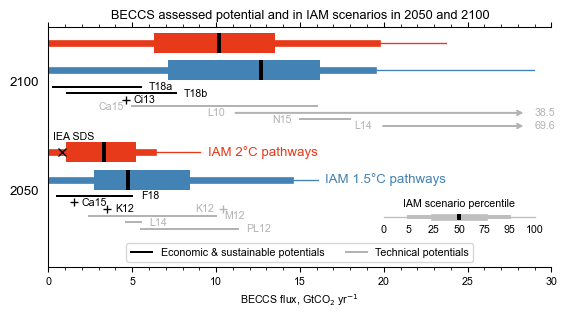

In [17]:
years = [2050, 2100]

fig,ax = pl.subplots(figsize=(15.1/2.54, 8.5/2.54))

for i, year in enumerate(years):
    ax.plot((beccs_q['1.5'][50][year-2015]/1000), i+0.1, marker='|', color='k', markersize=15, markeredgewidth=3, zorder=5)
    ax.plot((beccs_q['1.5'][25][year-2015]/1000,beccs_q['1.5'][75][year-2015]/1000), (i+0.1,i+0.1), lw=15, color=colors_two['1.5']);
    ax.plot((beccs_q['1.5'][5][year-2015]/1000,beccs_q['1.5'][95][year-2015]/1000), (i+0.1,i+0.1), lw=5, color=colors_two['1.5']);
    ax.plot((beccs_q['1.5'][0][year-2015]/1000,beccs_q['1.5'][100][year-2015]/1000), (i+0.1,i+0.1), lw=1, color=colors_two['1.5']);

    ax.plot((beccs_q['2.0'][50][year-2015]/1000), i+0.35, marker='|', color='k', markersize=15, markeredgewidth=3, zorder=5)
    ax.plot((beccs_q['2.0'][25][year-2015]/1000,beccs_q['2.0'][75][year-2015]/1000), (i+0.35,i+0.35), lw=15, color=colors_two['2.0']);
    ax.plot((beccs_q['2.0'][5][year-2015]/1000,beccs_q['2.0'][95][year-2015]/1000), (i+0.35,i+0.35), lw=5, color=colors_two['2.0']);
    ax.plot((beccs_q['2.0'][0][year-2015]/1000,beccs_q['2.0'][100][year-2015]/1000), (i+0.35,i+0.35), lw=1, color=colors_two['2.0']);

# IEA 2050 SDS
ax.plot(0.802, 0.35, 'x', color='k')
ax.text(0.3, 0.47, 'IEA SDS')

# 2100 or no specified date estimates from literature
ax.plot((0.3, 5.5), (0.95, 0.95), ls='-', label='Economic & sustainable potentials', color='k')  
ax.text(6, 0.95, 'T18a', va='center')

ax.plot((1.1, 7.6), (0.89, 0.89), ls='-', color='k')
ax.text(8.1, 0.89, 'T18b', va='center')

ax.plot(4.6, 0.83, marker='+', color='k')
ax.text(5.1, 0.83, 'Ci13', va='center')

ax.plot((5,16), (0.77,0.77), ls='-', color='0.7')
ax.text(4.5, 0.77, 'Ca15', va='center', ha='right', color='0.7')

ax.annotate("", xy=(28.5, 0.71), xytext=(11, 0.71), arrowprops=dict(arrowstyle="->", color='0.7', lw=1.5))
ax.text(29, 0.71, '38.5', color='0.7', va='center')
ax.text(10.5, 0.71, 'L10', ha='right', va='center', color='0.7')

ax.plot((15,18), (0.65,0.65), ls='-', color='0.7', label='Technical potentials') #NAS
ax.text(14.5, 0.65, 'N15', ha='right', va='center', color='0.7')

# Lenton 2014
ax.annotate("", xy=(28.5, 0.59), xytext=(19.8, 0.59), arrowprops=dict(arrowstyle="->", color='0.7', lw=1.5))
ax.text(29, 0.59, '69.6', color='0.7', va='center')
ax.text(19.3, 0.59, 'L14', ha='right', va='center', color='0.7')

# 2050 estimates from literature
ax.plot((0.5, 5), (-0.05, -0.05), ls='-', color='k')
ax.text(5.5, -0.05, 'F18', va='center')

ax.plot(1.5, -0.11, marker='+', color='k')
ax.text(2.0, -0.11, 'Ca15', va='center')

ax.plot(3.5, -0.17, marker='+', color='k')  # black indicates potentials constrained by
    # one or more of technology scale up, economics or sustainability: i.e. "realistic" estimates
ax.text(4.0, -0.17, 'K12', va='center')
    
ax.plot(10.4, -0.17, marker='+', color='0.7')
ax.text(9.9, -0.17, 'K12', va='center', ha='right', color='0.7')

ax.plot((2.4, 10), (-0.23, -0.23), ls='-', color='0.7')   # grey indicates technical potentials
ax.text(10.5, -0.23, 'M12', va='center', color='0.7')

ax.plot((4.6, 5.5), (-0.29, -0.29), ls='-', color='0.7')   # grey indicates technical potentials
ax.text(6, -0.29, 'L14', va='center', color='0.7')

ax.plot((5.5, 11.3), (-0.35, -0.35), ls='-', color='0.7')   # grey indicates technical potentials
ax.text(11.8, -0.35, 'PL12', va='center', color='0.7')

ax.legend(loc='lower center', frameon=True, ncol=2)
ax.set_xlim(0,30)
ax.set_ylim(-0.7, 1.5)
ax.set_xlabel('BECCS flux, GtCO$_2$ yr$^{-1}$')
ax.spines['right'].set_visible(False)
ax.yaxis.set_ticks([0, 1])
ax.yaxis.set_ticklabels(['2050', '2100'], size=10)
pl.tick_params(axis = 'y', which = 'both', left=False, right=False)

ax.text(9.5, 0.35, 'IAM 2°C pathways', color=colors_two['2.0'], size=10, va='center')
ax.text(16.5, 0.1, 'IAM 1.5°C pathways', color=colors_two['1.5'], size=10, va='center')

ax.text(24.5,-0.12,'IAM scenario percentile',ha='center',va='center')
ax.plot((20,29),(-0.24,-0.24),color='0.75', lw=1)
ax.plot((21.5,27.5),(-0.24,-0.24),color='0.75', lw=3)
ax.plot((23,26),(-0.24,-0.24),color='0.75', lw=5)
ax.plot((24.5), -0.24, marker='|', color='k', markersize=5, markeredgewidth=3, zorder=5)
ax.text(20,-0.36,0,ha='center',va='center')
ax.text(21.5,-0.36,5,ha='center',va='center')
ax.text(23,-0.36,25,ha='center',va='center')
ax.text(24.5,-0.36,50,ha='center',va='center')
ax.text(26,-0.36,75,ha='center',va='center')
ax.text(27.5,-0.36,95,ha='center',va='center')
ax.text(29,-0.36,100,ha='center',va='center')

ax.set_title('BECCS assessed potential and in IAM scenarios in 2050 and 2100')
fig.tight_layout()
pl.savefig('../figures/fig2.pdf')
pl.savefig('../figures/fig2.png', dpi=300)

### what fraction of scenarios have more 2050 BECCS than Fuss et al.?

5.0 in 2050

In [18]:
print(beccs_q['1.5'][53][2050-2015]/1000)   # 47% of 1.5 scenarios
print(beccs_q['2.0'][82][2050-2015]/1000)   # 18% of 2.0 scenarios
print(beccs_q['all'][69][2050-2015]/1000)   # 31% of combined scenarios

5.074061780469999
5.06091192444
5.013165871999999


### what fraction of scenarios have more 2100 BECCS than Turner et al.?

7.6 in 2100

In [19]:
print(beccs_q['1.5'][25][2100-2015]/1000)   # 75% of 1.5 scenarios
print(beccs_q['2.0'][29][2100-2015]/1000)   # 71% of 2.0 scenarios
print(beccs_q['all'][27][2100-2015]/1000)   # 73% of combined scenarios

7.7409237125
7.750397888369999
7.724206531270002


### where do our 2030 projections sit?
9.41 MtCO2

In [20]:
print(beccs_q['2.0'][31][2030-2015]/1000)
print(beccs_q['2.0'][32][2030-2015]/1000)
print(beccs_q['1.5'][35][2030-2015]/1000)
print(beccs_q['1.5'][36][2030-2015]/1000)

0.008681295999999998
0.009486263999999998
0.0076376749999999966
0.0096679


### where does IEA SDS sit?
0.075 in 2030 (SDS)/0.035 in 2030 (NZE), 0.802 in 2050 (SDS), 2.649 in 2070 (SDS)

In [21]:
print(beccs_q['2.0'][58][2030-2015]/1000)
print(beccs_q['2.0'][59][2030-2015]/1000)
print(beccs_q['1.5'][42][2030-2015]/1000)
print(beccs_q['1.5'][43][2030-2015]/1000)

0.0730170667208
0.0756630179263
0.033285913999999875
0.05201090299999997


In [22]:
print(beccs_q['2.0'][16][2050-2015]/1000)
print(beccs_q['2.0'][17][2050-2015]/1000)
print(beccs_q['2.0'][11][2070-2015]/1000)
print(beccs_q['2.0'][12][2070-2015]/1000)

0.7723368399999999
0.8664395299809998
2.3660867997699997
2.8194061868399998


In [23]:
print(beccs_q['1.5'][50][2050-2015]/1000)
print(beccs_q['2.0'][50][2050-2015]/1000)
print(beccs_q['1.5'][100][2050-2015]/1000)
print(beccs_q['2.0'][100][2050-2015]/1000)
print(beccs_q['1.5'][50][2100-2015]/1000)
print(beccs_q['2.0'][50][2100-2015]/1000)

4.7178192365
3.3359586560000003
16.1
9.012508912000001
12.70681171
10.158698525


In [24]:
print(beccs_q['1.5'][25][2050-2015]/1000, beccs_q['1.5'][75][2050-2015]/1000)
print(beccs_q['2.0'][25][2050-2015]/1000, beccs_q['2.0'][75][2050-2015]/1000)
print(beccs_q['1.5'][25][2100-2015]/1000, beccs_q['1.5'][75][2100-2015]/1000)
print(beccs_q['2.0'][25][2100-2015]/1000, beccs_q['2.0'][75][2100-2015]/1000)

3.3345140605 7.859378
1.6167061999999999 4.623949247
7.7409237125 15.583995535
6.873675475 12.922992985


### how many 2020 scenarios have lots of BECCS?

In [25]:
print(beccs_q['1.5'][84][2020-2015])
print(beccs_q['2.0'][87][2020-2015])

12.720975999999942
9.58944729362


### how many 2050 and 2100 scenarios exceed cumulative BECCS?

In [26]:
#for cat in ['Below 1.5C', '1.5C-low-OS','1.5C-high-OS','Lower 2C','Higher 2C','Above 2C']:

print(np.percentile(analysis_df[analysis_df.Category.str.contains('1.5C')]['cumulative_beccs_2050'].values/1000, 18))
print(np.nanpercentile(analysis_df[analysis_df.Category.str.contains('r 2C')]['cumulative_beccs_2050'].values/1000, 27))
print(np.nanpercentile(analysis_df[
    (analysis_df['Category']=='Below 1.5C') |
    (analysis_df['Category']=='1.5C-low-OS') |
    (analysis_df['Category']=='1.5C-high-OS') |
    (analysis_df['Category']=='Lower 2C') |
    (analysis_df['Category']=='Higher 2C')]['cumulative_beccs_2050'].values/1000, 23))

print(np.percentile(analysis_df[analysis_df.Category.str.contains('1.5C')]['cumulative_beccs_2100'].values/1000, 36))
print(np.nanpercentile(analysis_df[analysis_df.Category.str.contains('r 2C')]['cumulative_beccs_2100'].values/1000, 63))

print(np.nanpercentile(analysis_df[
    (analysis_df['Category']=='Below 1.5C') |
    (analysis_df['Category']=='1.5C-low-OS') |
    (analysis_df['Category']=='1.5C-high-OS') |
    (analysis_df['Category']=='Lower 2C') |
    (analysis_df['Category']=='Higher 2C')]['cumulative_beccs_2100'].values/1000, 52))

15.834661782703208
15.497058540751004
15.216975577083186
469.143704224652
453.56063350870795
456.37089839956803


## Figure 3

In [27]:
colors = (
    {
        'Below 1.5C':'#a7cce9',
        '1.5C-low-OS': '#2177b8',
        '1.5C-high-OS': '#00447c',
        'Lower 2C': '#ec741b',
        'Higher 2C': '#e2001a',
        'Above 2C': 'gray',
    }
)

### Run OLS regressions: include the >2C scenarios

In [28]:
Y = analysis_df['cumulative_beccs_2050']/1000
X = analysis_df['temp_2050']
X = sm.add_constant(X)
model = sm.OLS(Y,X,missing='drop')
cb_temp_2050 = model.fit()
cb_temp_2050.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                             
=================================================================================
Dep. Variable:     cumulative_beccs_2050   R-squared:                       0.247
Model:                               OLS   Adj. R-squared:                  0.245
Method:                    Least Squares   F-statistic:                     129.8
Date:                   Thu, 25 Feb 2021   Prob (F-statistic):           3.36e-26
Time:                           12:22:44   Log-Likelihood:                -1933.0
No. Observations:                    397   AIC:                             3870.
Df Residuals:                        395   BIC:                             3878.
Df Model:                              1                                         
Covariance Type:               nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        177.4019     13.342     13.296      0.000     151.171     203.633
temp_2050    -82.3967      7.231    -11.395      0.000     -96.613     -68.180
==============================================================================
Omnibus:                      208.912   Durbin-Watson:                   1.463
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1220.874
Skew:                           2.246   Prob(JB):                    7.77e-266
Kurtosis:                      10.323   Cond. No.                         20.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [29]:
Y = analysis_df['cumulative_beccs_2100']/1000
X = analysis_df['temp_2100']
X = sm.add_constant(X)
model = sm.OLS(Y,X,missing='drop')
cb_temp_2100 = model.fit()
cb_temp_2100.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                             
=================================================================================
Dep. Variable:     cumulative_beccs_2100   R-squared:                       0.467
Model:                               OLS   Adj. R-squared:                  0.465
Method:                    Least Squares   F-statistic:                     345.7
Date:                   Thu, 25 Feb 2021   Prob (F-statistic):           6.98e-56
Time:                           12:22:44   Log-Likelihood:                -2676.3
No. Observations:                    397   AIC:                             5357.
Df Residuals:                        395   BIC:                             5365.
Df Model:                              1                                         
Covariance Type:               nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        753.4073     25.903     29.085      0.000     702.481     804.333
temp_2100   -195.2647     10.502    -18.592      0.000    -215.912    -174.617
==============================================================================
Omnibus:                        4.400   Durbin-Watson:                   1.320
Prob(Omnibus):                  0.111   Jarque-Bera (JB):                5.107
Skew:                           0.103   Prob(JB):                       0.0778
Kurtosis:                       3.516   Cond. No.                         7.08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [30]:
Y = analysis_df['fed_2050']
X = analysis_df['temp_2050']
X = sm.add_constant(X)
model = sm.OLS(Y,X,missing='drop')
fed_temp_2050 = model.fit()
fed_temp_2050.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               fed_2050   R-squared:                       0.547
Model:                            OLS   Adj. R-squared:                  0.545
Method:                 Least Squares   F-statistic:                     485.7
Date:                Thu, 25 Feb 2021   Prob (F-statistic):           3.32e-71
Time:                        12:22:44   Log-Likelihood:                -2323.7
No. Observations:                 405   AIC:                             4651.
Df Residuals:                     403   BIC:                             4659.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -175.8486     31.729     -5.542      0.000    -238.223    -113.474
temp_2050    379.4043     17.215     22.039      0.000     345.562     413.247
==============================================================================
Omnibus:                        4.966   Durbin-Watson:                   0.591
Prob(Omnibus):                  0.083   Jarque-Bera (JB):                5.189
Skew:                           0.177   Prob(JB):                       0.0747
Kurtosis:                       3.427   Cond. No.                         20.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [31]:
Y = analysis_df['fed_2100']
X = analysis_df['temp_2100']
X = sm.add_constant(X)
model = sm.OLS(Y,X,missing='drop')
fed_temp_2100 = model.fit()
fed_temp_2100.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               fed_2100   R-squared:                       0.255
Model:                            OLS   Adj. R-squared:                  0.253
Method:                 Least Squares   F-statistic:                     137.4
Date:                Thu, 25 Feb 2021   Prob (F-statistic):           1.69e-27
Time:                        12:22:44   Log-Likelihood:                -2598.4
No. Observations:                 404   AIC:                             5201.
Df Residuals:                     402   BIC:                             5209.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        448.0407     19.080     23.483      0.000     410.533     485.549
temp_2100     90.8330      7.749     11.722      0.000      75.600     106.066
==============================================================================
Omnibus:                       47.617   Durbin-Watson:                   0.443
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               14.654
Skew:                           0.143   Prob(JB):                     0.000657
Kurtosis:                       2.112   Cond. No.                         7.16
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [32]:
Y = analysis_df['cumulative_beccs_2050']/1000
X = analysis_df['fed_2050']
X = sm.add_constant(X)
model = sm.OLS(Y,X,missing='drop')
cb_fed_2050 = model.fit()
#cb_fed_2050.summary()

In [33]:
Y = analysis_df['cumulative_beccs_2100']/1000
X = analysis_df['fed_2100']
X = sm.add_constant(X)
model = sm.OLS(Y,X,missing='drop')
cb_fed_2100 = model.fit()
#cb_fed_2100.summary()

In [34]:
dir(fed_temp_2050)
fed_temp_2050.params

const       -175.848599
temp_2050    379.404273
dtype: float64

In [35]:
print('{:.2f}'.format(fed_temp_2050.rsquared))

0.55


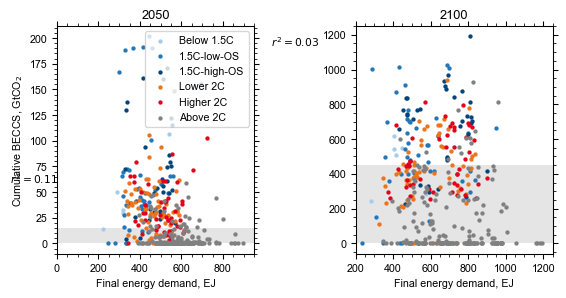

In [36]:
fig,ax = pl.subplots(1,2,figsize=(15.1/2.54, 8/2.54))
for cat in ['Below 1.5C', '1.5C-low-OS','1.5C-high-OS','Lower 2C','Higher 2C','Above 2C']:
    ax[0].scatter(
        analysis_df[analysis_df.Category==cat]['fed_2050'],
        analysis_df[analysis_df.Category==cat]['cumulative_beccs_2050']/1000,
        color=colors[cat], label=cat, s=5,
    )
    ax[1].scatter(
        analysis_df[analysis_df.Category==cat]['fed_2100'],
        analysis_df[analysis_df.Category==cat]['cumulative_beccs_2100']/1000,
        color=colors[cat], label=cat, s=5
    )

ax[0].text(2.55, 70, '$r^2={:.2f}$'.format(cb_fed_2050.rsquared), ha='right', va='top')
ax[1].text(5.5, 1200, '$r^2={:.2f}$'.format(cb_fed_2100.rsquared), ha='right', va='top')

ax[0].fill_between(np.linspace(0,950), 0, 15, color='k', alpha=0.1, zorder=-10, lw=0)   # Caldecott
ax[1].fill_between(np.linspace(200, 1250), 0, 453, color='k', alpha=0.1, zorder=-10, lw=0)  # Caldecott

ax[0].set_title('2050')
ax[1].set_title('2100')
ax[0].legend()

ax[0].set_xlim(0,950)
ax[1].set_xlim(200,1250)

ax[0].set_ylabel('Cumulative BECCS, GtCO$_2$')
ax[1].set_xlabel('Final energy demand, EJ')
ax[0].set_xlabel('Final energy demand, EJ')
fig.tight_layout()

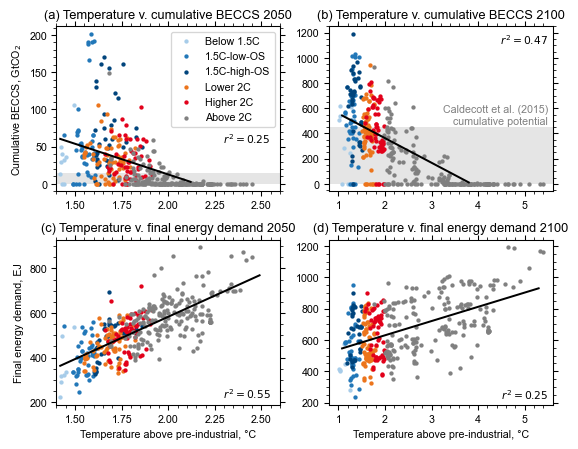

In [37]:
fig, ax = pl.subplots(2,2)
for cat in ['Below 1.5C', '1.5C-low-OS','1.5C-high-OS','Lower 2C','Higher 2C','Above 2C']:
    ax[0,0].scatter(
        analysis_df[analysis_df.Category==cat]['temp_2050'],
        analysis_df[analysis_df.Category==cat]['cumulative_beccs_2050']/1000,
        color=colors[cat], label=cat, s=5,
    )
    ax[0,1].scatter(
        analysis_df[analysis_df.Category==cat]['temp_2100'],
        analysis_df[analysis_df.Category==cat]['cumulative_beccs_2100']/1000,
        color=colors[cat], label=cat, s=5
    )
    ax[1,0].scatter(
        analysis_df[analysis_df.Category==cat]['temp_2050'], 
        analysis_df[analysis_df.Category==cat]['fed_2050'],
        color=colors[cat], label=cat, s=5
    )
    ax[1,1].scatter(
        analysis_df[analysis_df.Category==cat]['temp_2100'],
        analysis_df[analysis_df.Category==cat]['fed_2100'], 
        color=colors[cat], label=cat, s=5
    )

ax[0,0].plot(
    np.arange(1.42,2.13,0.01),
    cb_temp_2050.params['const'] + cb_temp_2050.params['temp_2050']*np.arange(1.42,2.13,0.01),
    color='k'
)
ax[0,0].text(2.55, 70, '$r^2={:.2f}$'.format(cb_temp_2050.rsquared), ha='right', va='top')

ax[0,1].plot(
    np.arange(1.08,3.81,0.01),
    cb_temp_2100.params['const'] + cb_temp_2100.params['temp_2100']*np.arange(1.08,3.81,0.01),
    color='k'
)
ax[0,1].text(5.5, 1200, '$r^2={:.2f}$'.format(cb_temp_2100.rsquared), ha='right', va='top')

ax[1,0].plot(
    np.arange(1.42,2.5,0.01),
    fed_temp_2050.params['const'] + fed_temp_2050.params['temp_2050']*np.arange(1.42,2.5,0.01),
    color='k'
) 
ax[1,0].text(2.55, 210, '$r^2={:.2f}$'.format(fed_temp_2050.rsquared), ha='right', va='bottom')

ax[1,1].plot(
    np.arange(1.08,5.31,0.01),
    fed_temp_2100.params['const'] + fed_temp_2100.params['temp_2100']*np.arange(1.08,5.31,0.01),
    color='k'
)
ax[1,1].text(5.5, 210, '$r^2={:.2f}$'.format(fed_temp_2100.rsquared), ha='right', va='bottom')

ax[0,0].fill_between(np.linspace(0.8,5.6), 0, 15, color='k', alpha=0.1, zorder=-10, lw=0)   # Caldecott

ax[0,1].fill_between(np.linspace(0.8,5.6), 0, 453, color='k', alpha=0.1, zorder=-10, lw=0)  # Caldecott
ax[0,1].text(5.5,458, 'Caldecott et al. (2015)\ncumulative potential', ha='right', va='bottom', color='0.5')

ax[0,0].set_title('(a) Temperature v. cumulative BECCS 2050')
ax[0,1].set_title('(b) Temperature v. cumulative BECCS 2100')
ax[1,0].set_title('(c) Temperature v. final energy demand 2050')
ax[1,1].set_title('(d) Temperature v. final energy demand 2100')
ax[0,0].legend()

ax[0,0].set_xlim(1.4,2.6)
ax[0,1].set_xlim(0.8,5.6)
ax[1,0].set_xlim(1.4,2.6)
ax[1,1].set_xlim(0.8,5.6)

ax[0,0].set_ylabel('Cumulative BECCS, GtCO$_2$')
ax[1,0].set_ylabel('Final energy demand, EJ')
ax[1,0].set_xlabel('Temperature above pre-industrial, °C');
ax[1,1].set_xlabel('Temperature above pre-industrial, °C');
fig.tight_layout()

pl.savefig('../figures/fig3.pdf')
pl.savefig('../figures/fig3.png', dpi=300)

## Figure 1

In [38]:
beccs_plants_df = pd.read_excel('../data/BECCS plants.xlsx', engine='openpyxl')
plants_year = beccs_plants_df['Year operational'].values
plants_cumbeccs = beccs_plants_df['Cumulative'].values
plants_year = np.append(plants_year, [2030])
plants_cumbeccs = np.append(plants_cumbeccs, plants_cumbeccs[1])

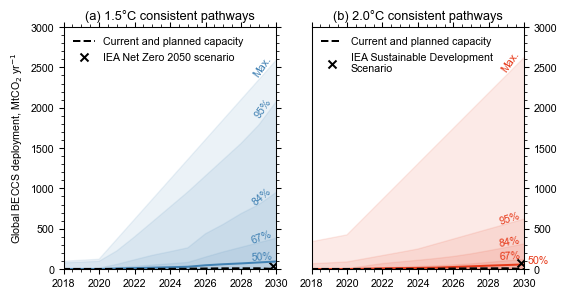

In [39]:
fig, ax = pl.subplots(1,2, figsize=(15.1/2.54, 8/2.54))
ax[0].fill_between(np.arange(2015,2101), beccs_q['1.5'][0], beccs_q['1.5'][100], color=colors_two['1.5'], alpha=0.1)
ax[0].fill_between(np.arange(2015,2101), beccs_q['1.5'][5], beccs_q['1.5'][95], color=colors_two['1.5'], alpha=0.1)
ax[0].fill_between(np.arange(2015,2101), beccs_q['1.5'][16], beccs_q['1.5'][84], color=colors_two['1.5'], alpha=0.1)
ax[0].fill_between(np.arange(2015,2101), beccs_q['1.5'][33], beccs_q['1.5'][67], color=colors_two['1.5'], alpha=0.1)
ax[0].plot(np.arange(2015,2101), beccs_q['1.5'][50], color=colors_two['1.5'])
ax[0].set_title('(a) 1.5°C consistent pathways')
ax[0].text(2029.8, beccs_q['1.5'][100][15]-80, 'Max.', color=colors_two['1.5'], va='center', ha='right', rotation=55)
ax[0].text(2029.8, beccs_q['1.5'][95][15]-90, '95%', color=colors_two['1.5'], va='center', ha='right', rotation=55)
ax[0].text(2029.8, beccs_q['1.5'][84][15]-50, '84%', color=colors_two['1.5'], va='center', ha='right', rotation=40)
ax[0].text(2029.8, beccs_q['1.5'][67][15]+10, '67%', color=colors_two['1.5'], va='center', ha='right', rotation=20)
ax[0].text(2029.8, beccs_q['1.5'][50][15]+60, '50%', color=colors_two['1.5'], va='center', ha='right', rotation=4)
ax[0].scatter(2029.8, 35, marker='x', label='IEA Net Zero 2050 scenario', color='k')
ax[0].plot(plants_year, plants_cumbeccs, ls='--', color='k', label='Current and planned capacity', zorder=4)
ax[0].legend(frameon=False, loc='upper left')
ax[0].set_ylabel('Global BECCS deployment, MtCO$_2$ yr$^{-1}$')
ax[0].set_xlim(2018,2030)
ax[0].set_ylim(0,3000)

ax[1].fill_between(np.arange(2015,2101), beccs_q['2.0'][0], beccs_q['2.0'][100], color=colors_two['2.0'], alpha=0.1)
ax[1].fill_between(np.arange(2015,2101), beccs_q['2.0'][5], beccs_q['2.0'][95], color=colors_two['2.0'], alpha=0.1)
ax[1].fill_between(np.arange(2015,2101), beccs_q['2.0'][16], beccs_q['2.0'][84], color=colors_two['2.0'], alpha=0.1)
ax[1].fill_between(np.arange(2015,2101), beccs_q['2.0'][33], beccs_q['2.0'][67], color=colors_two['2.0'], alpha=0.1)
ax[1].plot(np.arange(2015,2101), beccs_q['2.0'][50], color=colors_two['2.0'])
ax[1].set_title('(b) 2.0°C consistent pathways')
ax[1].text(2029.8, beccs_q['2.0'][100][15]-50, 'Max.', color=colors_two['2.0'], va='center', ha='right', rotation=55)
ax[1].text(2029.8, beccs_q['2.0'][95][15]+10, '95%', color=colors_two['2.0'], va='center', ha='right', rotation=18)
ax[1].text(2029.8, beccs_q['2.0'][84][15]+30, '84%', color=colors_two['2.0'], va='center', ha='right', rotation=10)
ax[1].text(2029.8, beccs_q['2.0'][67][15]+40, '67%', color=colors_two['2.0'], va='center', ha='right', rotation=3)
ax[1].plot(plants_year, plants_cumbeccs, ls='--', color='k', label='Current and planned capacity')
ax[1].text(2030.2, 40, '50%', ha='left', va='bottom', color=colors_two['2.0'])
ax[1].scatter(2029.8, 75, marker='x', label='IEA Sustainable Development\nScenario', color='k', zorder=4)

ax[1].legend(frameon=False, loc='upper left')
ax[1].yaxis.tick_right()
ax[1].set_xlim(2018,2030)
ax[1].set_ylim(0,3000)

fig.tight_layout()
pl.savefig('../figures/fig1.pdf')
pl.savefig('../figures/fig1.png', dpi=300)

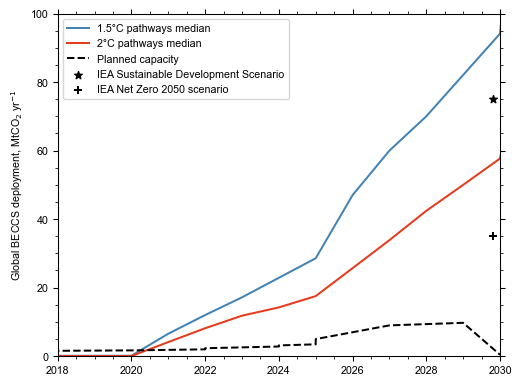

In [40]:
pl.plot(np.arange(2015,2101), beccs_q['1.5'][50], color=colors_two['1.5'], label='1.5°C pathways median')
pl.plot(np.arange(2015,2101), beccs_q['2.0'][50], color=colors_two['2.0'], label='2°C pathways median')
pl.plot(plants_year, plants_cumbeccs, ls='--', color='k', label='Planned capacity')
pl.scatter(2029.8, 75, marker='*', label='IEA Sustainable Development Scenario', color='k')
pl.scatter(2029.8, 35, marker='+', label='IEA Net Zero 2050 scenario', color='k')
pl.xlim(2018,2030)
pl.ylim(0,100)
pl.ylabel('Global BECCS deployment, MtCO$_2$ yr$^{-1}$')
pl.legend()